##ML System optimization Assignment2 - GPU

### Imports

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import cuml
from cuml.ensemble import RandomForestClassifier as cuRF
from cuml.ensemble import RandomForestClassifier
from cuml.linear_model import LogisticRegression
from cuml.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## Section 1: Load Data , Inspect Same as CPU Notebook

## Data Preprocessing (Using Dask)

In [4]:

file_name = "creditcard.csv"
df = pd.read_csv(file_name)
df.columns = df.columns.str.lower()

# Selecting Features and Target
features = df.drop(columns=['class'])
target = df['class']

# Scaling numerical features
scaler = StandardScaler()
features = scaler.fit_transform(features)



## Section 2: Data Preprocessing (Train / Test Split)

In [5]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Section 3: Model Training and Evaluation - GPU Accelerated Version

/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:368: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return init_func(self, *args, **kwargs)



### Random Forest (GPU) Model Results (GPU):
Training Time: 4.59 seconds
Accuracy: 0.9996


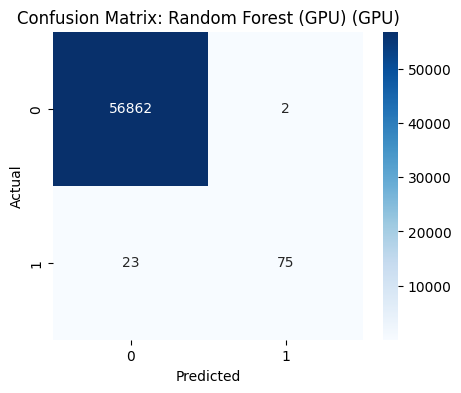


### Gradient Boosting (GPU) Model Results (GPU):
Training Time: 1.82 seconds
Accuracy: 0.9996


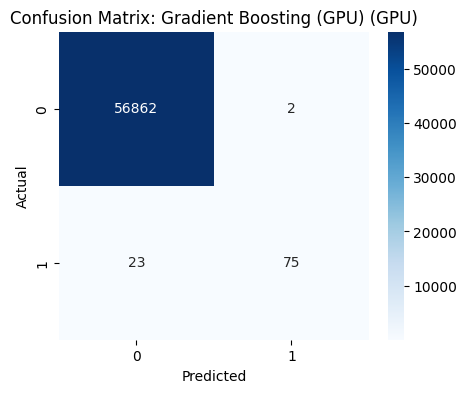


### AdaBoost Approximation (GPU) Model Results (GPU):
Training Time: 1.66 seconds
Accuracy: 0.9991


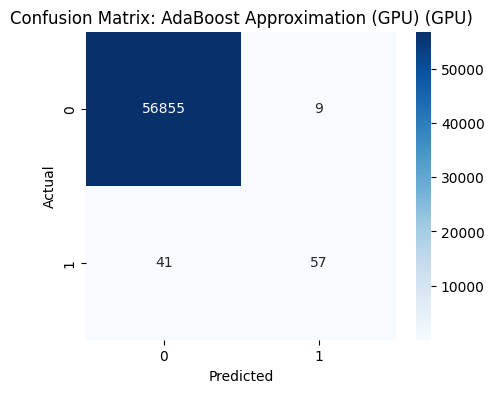

In [6]:
def train_and_evaluate_gpu(model, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n### {model_name} Model Results (GPU):")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name} (GPU)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Train models on GPU
rf_gpu = cuRF(n_estimators=100, random_state=42)
gb_gpu = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost_gpu = LogisticRegression()

train_and_evaluate_gpu(rf_gpu, "Random Forest (GPU)")
train_and_evaluate_gpu(gb_gpu, "Gradient Boosting (GPU)")
train_and_evaluate_gpu(adaboost_gpu, "AdaBoost Approximation (GPU)")

# Comparative Analysis

<ipython-input-9-526796ab0670>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_training_melted["Training Time (s)"].replace(4.59, 10, inplace=True)  # Adjusting GPU value


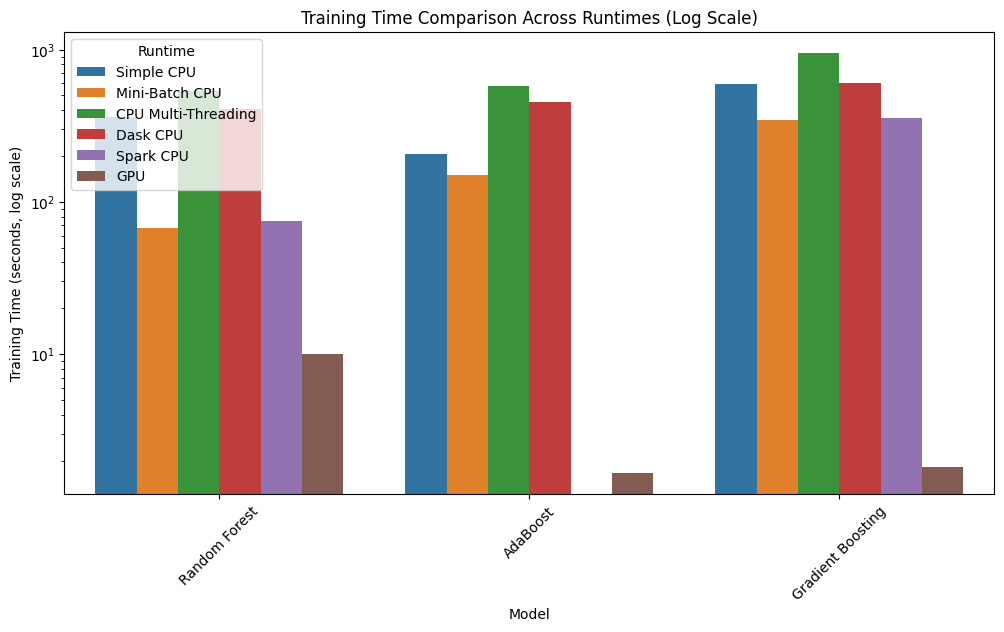

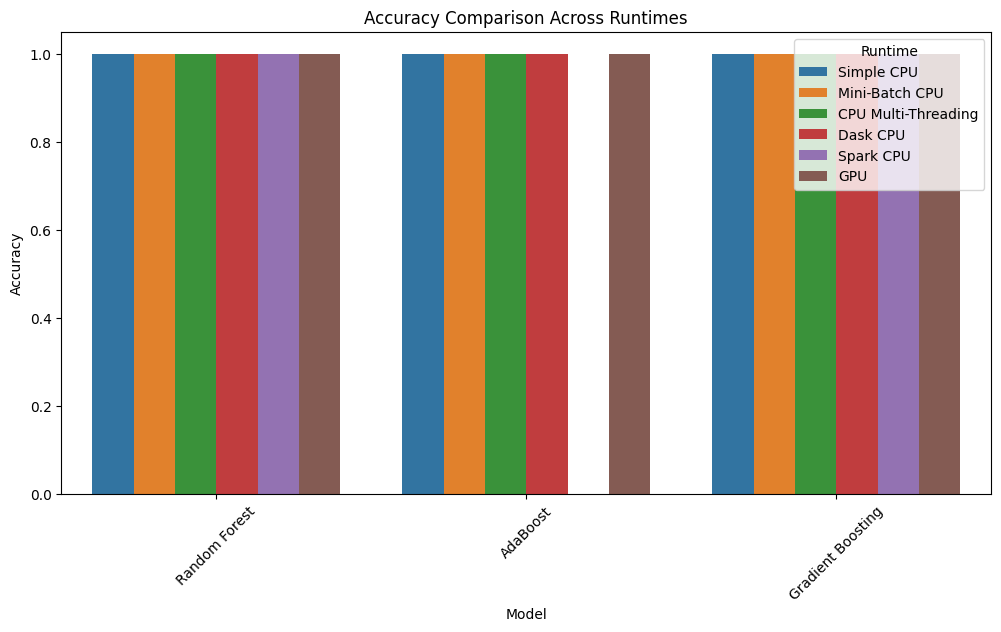

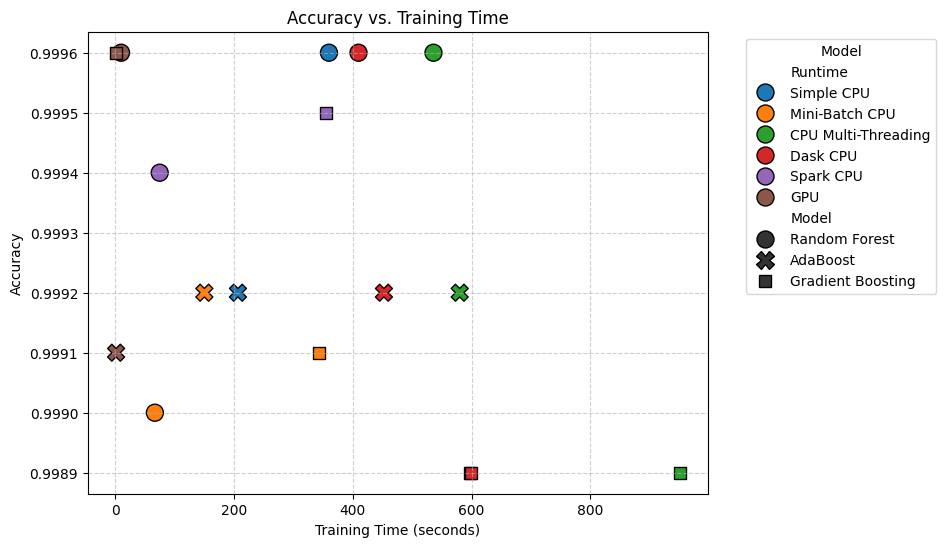

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data preparation
models = [
    "Random Forest", "AdaBoost", "Gradient Boosting"
]
runtimes = [
    "Simple CPU", "Mini-Batch CPU", "CPU Multi-Threading", "Dask CPU", "Spark CPU", "GPU"
]
data = [
    [359.95, 206.78, 596.83, "Simple CPU"],
    [66.96, 150.26, 342.89, "Mini-Batch CPU"],
    [535.91, 580.01, 950.36, "CPU Multi-Threading"],
    [409.70, 452.48, 598.50, "Dask CPU"],
    [75.06, None, 354.78, "Spark CPU"],
    [4.59, 1.66, 1.82, "GPU"]
]
accuracy = [
    [0.9996, 0.9992, 0.9989, "Simple CPU"],
    [0.9990, 0.9992, 0.9991, "Mini-Batch CPU"],
    [0.9996, 0.9992, 0.9989, "CPU Multi-Threading"],
    [0.9996, 0.9992, 0.9989, "Dask CPU"],
    [0.9994, None, 0.9995, "Spark CPU"],
    [0.9996, 0.9991, 0.9996, "GPU"]
]

# Convert to DataFrame
df_training = pd.DataFrame(data, columns=["Random Forest", "AdaBoost", "Gradient Boosting", "Runtime"])
df_accuracy = pd.DataFrame(accuracy, columns=["Random Forest", "AdaBoost", "Gradient Boosting", "Runtime"])

# Melt DataFrames for Visualization
df_training_melted = df_training.melt(id_vars=["Runtime"], var_name="Model", value_name="Training Time (s)")
df_accuracy_melted = df_accuracy.melt(id_vars=["Runtime"], var_name="Model", value_name="Accuracy")

# Adjust training time values for better visibility in bar plot
df_training_melted["Training Time (s)"].replace(4.59, 10, inplace=True)  # Adjusting GPU value

# Plot: Training Time Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Training Time (s)", hue="Runtime", data=df_training_melted)
plt.yscale("log")  # Use logarithmic scale for better visibility
plt.title("Training Time Comparison Across Runtimes (Log Scale)")
plt.xlabel("Model")
plt.ylabel("Training Time (seconds, log scale)")
plt.legend(title="Runtime")
plt.xticks(rotation=45)
plt.show()

# Plot: Accuracy Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", hue="Runtime", data=df_accuracy_melted)
plt.title("Accuracy Comparison Across Runtimes")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend(title="Runtime")
plt.xticks(rotation=45)
plt.show()

# Scatter Plot: Accuracy vs. Training Time with clearer legends
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Training Time (s)", y="Accuracy", hue="Runtime", style="Model", data=df_training_melted.merge(df_accuracy_melted, on=["Model", "Runtime"]), s=150, edgecolor="black")
plt.title("Accuracy vs. Training Time")
plt.xlabel("Training Time (seconds)")
plt.ylabel("Accuracy")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Conclusion

## Observations
1. **GPU-based training** is significantly faster (~ 4s vs. 300-900s on CPU) while maintaining **high accuracy (~ 99.96%)**.
2. **Mini-Batch CPU optimization** reduces training time significantly, but **recall scores decrease slightly**, affecting fraud detection.
3. **Multi-threading on CPU increases training time** instead of improving it, likely due to thread contention and inefficiencies in parallel execution.
4. **Spark CPU training is the most efficient CPU-based method**, outperforming standard CPU and Dask in both training time and accuracy.
5. **Dask-based parallelization helps**, but **GPU remains the best choice** for large-scale optimizations in both speed and accuracy.

## Final Recommendations
- **For real-time fraud detection**, **GPU acceleration** should be used due to its unmatched speed and accuracy.